# Plaxonic Car data Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
car_df=pd.read_csv("car details v4.csv")
car_df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [3]:
# Convert the columns to string data type
car_df['Max Power'] = car_df['Max Power'].astype(str)
car_df['Max Torque'] = car_df['Max Torque'].astype(str)

# Splitting and processing 'Max Power' column
car_df['Power'] = car_df['Max Power'].str.split('@').str[0].str.strip().str.split().str[0]

# Splitting and processing 'Max Torque' column
car_df['Torque'] = car_df['Max Torque'].str.split('@').str[0].str.strip().str.split().str[0]

# Convert the 'power' & 'torque' columns to numeric data type
car_df['Power'] = pd.to_numeric(car_df['Power'], errors='coerce')
car_df['Torque'] = pd.to_numeric(car_df['Torque'], errors='coerce')

# Remove the original columns
car_df = car_df.drop(['Max Power', 'Max Torque'], axis=1)
car_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power,Torque
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,FWD,3990.0,1680.0,1505.0,5.0,35.0,87.0,109.0000
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,FWD,3995.0,1695.0,1555.0,5.0,42.0,74.0,190.0000
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,FWD,3585.0,1595.0,1550.0,5.0,35.0,79.0,112.7619
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,FWD,3995.0,1745.0,1510.0,5.0,37.0,82.0,113.0000
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,RWD,4735.0,1830.0,1795.0,7.0,55.0,148.0,343.0000


In [4]:
car_df.shape

(2059, 20)

In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Drivetrain          1923 non-null   object 
 13  Length              1995 non-null   float64
 14  Width               1995 non-null   float64
 15  Height              1995 non-null   float64
 16  Seatin

In [6]:

car_df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power,Torque
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000,1979.000000,1979.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210,129.611774,245.851019
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198,65.073797,140.465731
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000,35.000000,48.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000,83.000000,115.000000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000,116.000000,200.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000,171.000000,350.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000,660.000000,780.000000


In [7]:
car_df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
Power                  80
Torque                 80
dtype: int64

## Data Cleaning

In [8]:
# missing data
total = car_df.isnull().sum().sort_values(ascending=False)
percent = (car_df.isnull().sum()*100/car_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
Drivetrain,136,6.605148
Fuel Tank Capacity,113,5.488101
Torque,80,3.885381
Power,80,3.885381
Engine,80,3.885381
Seating Capacity,64,3.108305
Height,64,3.108305
Width,64,3.108305
Length,64,3.108305
Model,0,0.000000


In [9]:
for i in car_df.columns:
    print(i,car_df[i].nunique())

Make 33
Model 1050
Price 619
Year 22
Kilometer 847
Fuel Type 9
Transmission 2
Location 77
Color 17
Owner 6
Seller Type 3
Engine 108
Drivetrain 3
Length 248
Width 170
Height 196
Seating Capacity 6
Fuel Tank Capacity 55
Power 166
Torque 141


In [10]:
car_df=car_df.drop(["Model"],axis=1)

In [11]:
car_df.shape

(2059, 19)

In [12]:
Drivetrain = car_df.Drivetrain.mode()[0]
print(Drivetrain)
car_df["Drivetrain"].fillna(Drivetrain, inplace = True)

FWD


In [13]:
car_df.isna().sum()

Make                    0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Drivetrain              0
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
Power                  80
Torque                 80
dtype: int64

## Univariate Analysis

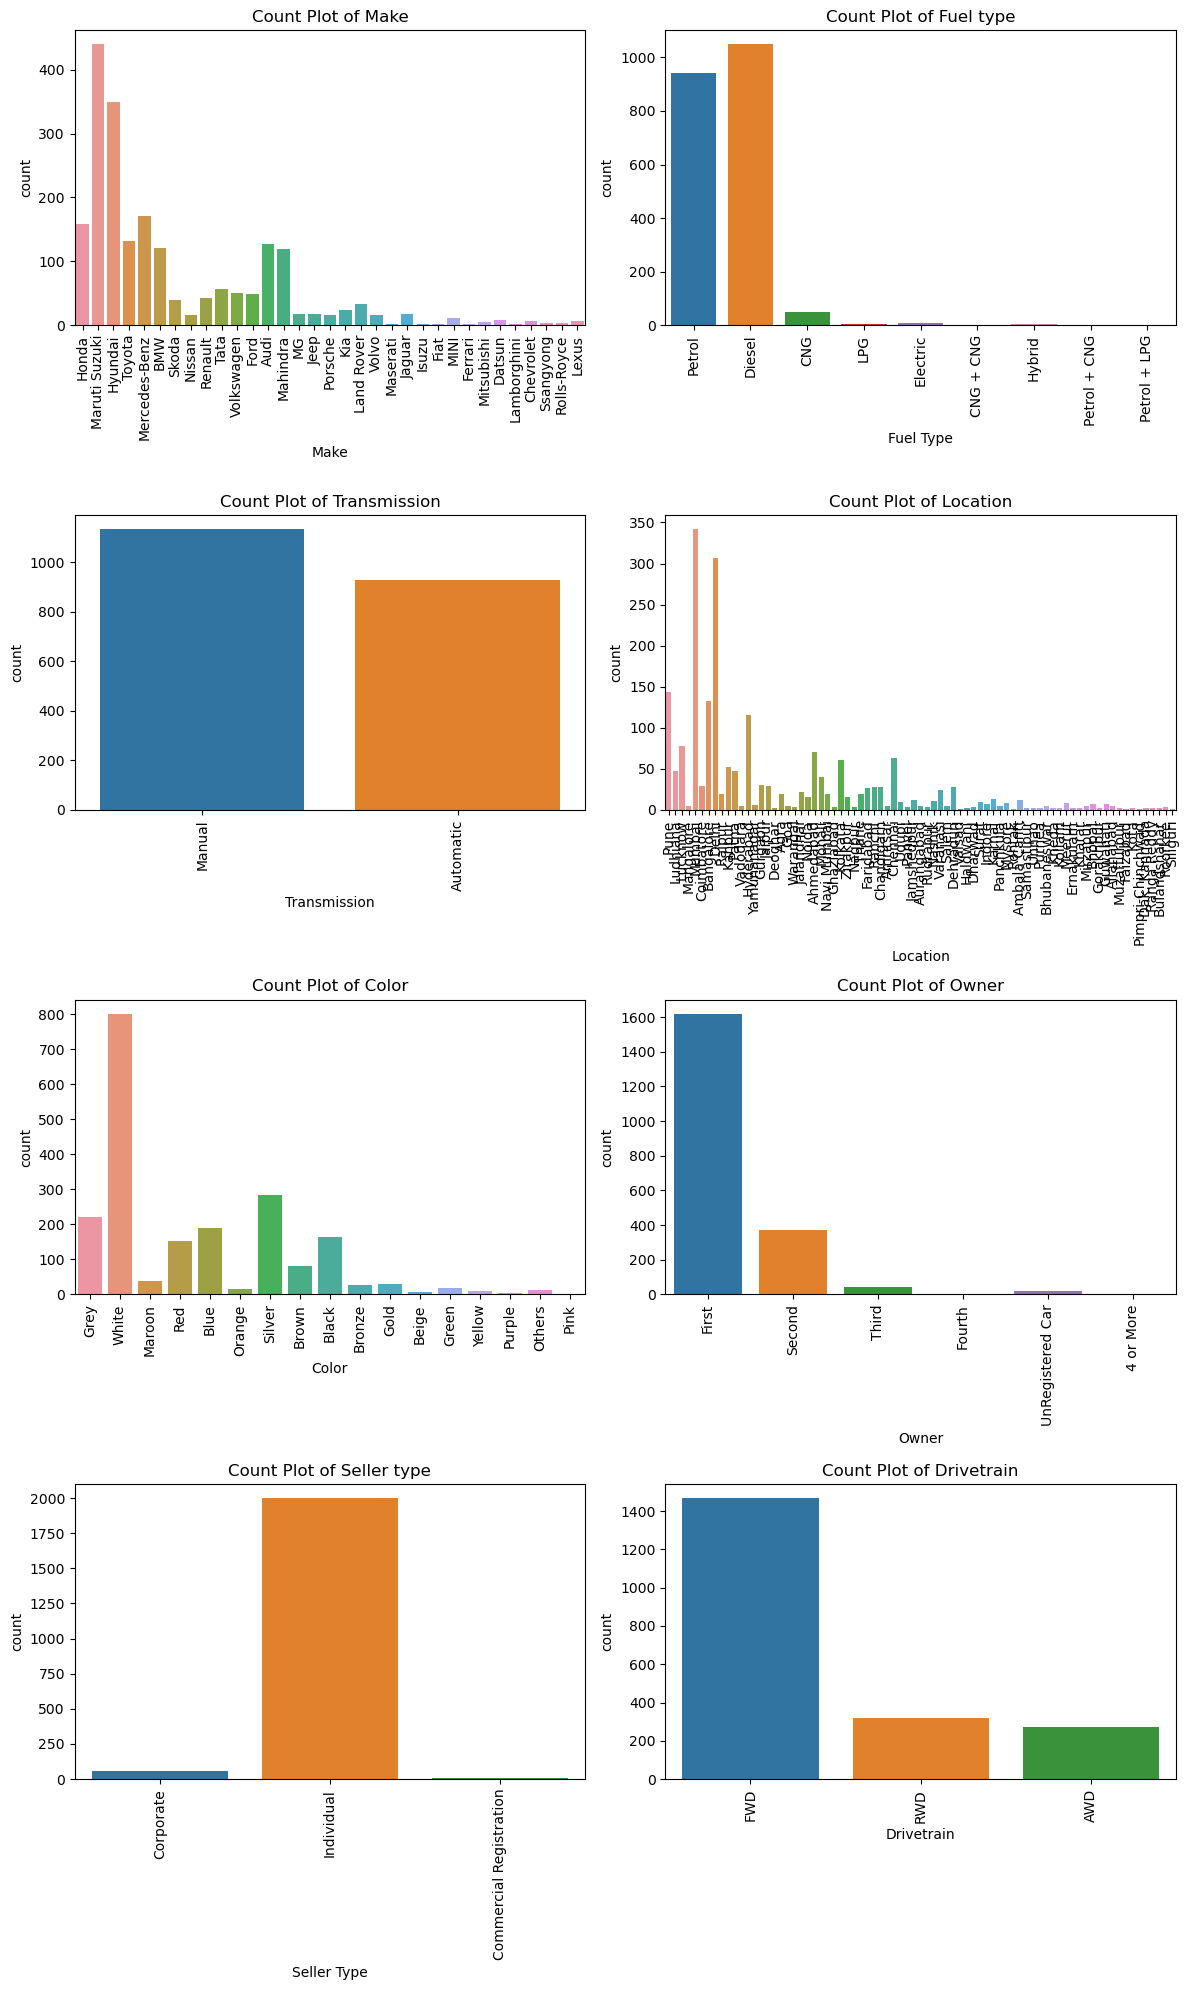

In [14]:
data=["Make","Fuel Type","Transmission","Location","Color","Owner","Seller Type","Drivetrain"]
fig, axs=plt.subplots(nrows = 4, ncols = 2, figsize = (12,20))
axs =axs.flatten()
for i , var in enumerate(data):
    sns.countplot(x = var, data = car_df, ax = axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
    axs[i].set_title(f"Count Plot of {data[i].capitalize()}")
fig.tight_layout()
plt.show()

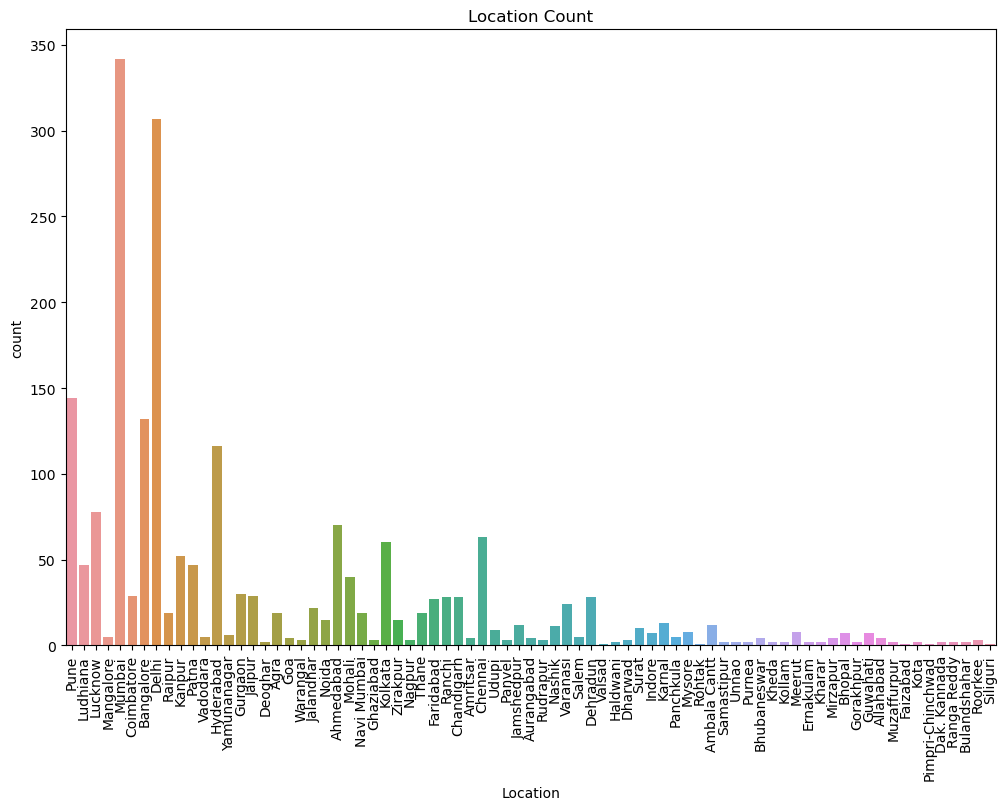

In [15]:
f,ax = plt.subplots(figsize=(12,8))
ax=sns.countplot(x="Location",data=car_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Location Count")
plt.show()

In [16]:
car_df=car_df.drop(["Location","Owner"],axis=1)

In [17]:
car_df.shape

(2059, 17)

In [18]:
car_df.head()

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Color,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power,Torque
0,Honda,505000,2017,87150,Petrol,Manual,Grey,Corporate,1198 cc,FWD,3990.0,1680.0,1505.0,5.0,35.0,87.0,109.0000
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,White,Individual,1248 cc,FWD,3995.0,1695.0,1555.0,5.0,42.0,74.0,190.0000
2,Hyundai,220000,2011,67000,Petrol,Manual,Maroon,Individual,1197 cc,FWD,3585.0,1595.0,1550.0,5.0,35.0,79.0,112.7619
3,Toyota,799000,2019,37500,Petrol,Manual,Red,Individual,1197 cc,FWD,3995.0,1745.0,1510.0,5.0,37.0,82.0,113.0000
4,Toyota,1950000,2018,69000,Diesel,Manual,Grey,Individual,2393 cc,RWD,4735.0,1830.0,1795.0,7.0,55.0,148.0,343.0000


In [19]:
# Remove the unit from the 'Engine' column
car_df['Engine'] = car_df['Engine'].str.replace(' cc', '')

# Convert the 'Engine' column to numeric data type
car_df['Engine'] = pd.to_numeric(car_df['Engine'], errors='coerce')
car_df.head()

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Color,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power,Torque
0,Honda,505000,2017,87150,Petrol,Manual,Grey,Corporate,1198.0,FWD,3990.0,1680.0,1505.0,5.0,35.0,87.0,109.0000
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,White,Individual,1248.0,FWD,3995.0,1695.0,1555.0,5.0,42.0,74.0,190.0000
2,Hyundai,220000,2011,67000,Petrol,Manual,Maroon,Individual,1197.0,FWD,3585.0,1595.0,1550.0,5.0,35.0,79.0,112.7619
3,Toyota,799000,2019,37500,Petrol,Manual,Red,Individual,1197.0,FWD,3995.0,1745.0,1510.0,5.0,37.0,82.0,113.0000
4,Toyota,1950000,2018,69000,Diesel,Manual,Grey,Individual,2393.0,RWD,4735.0,1830.0,1795.0,7.0,55.0,148.0,343.0000


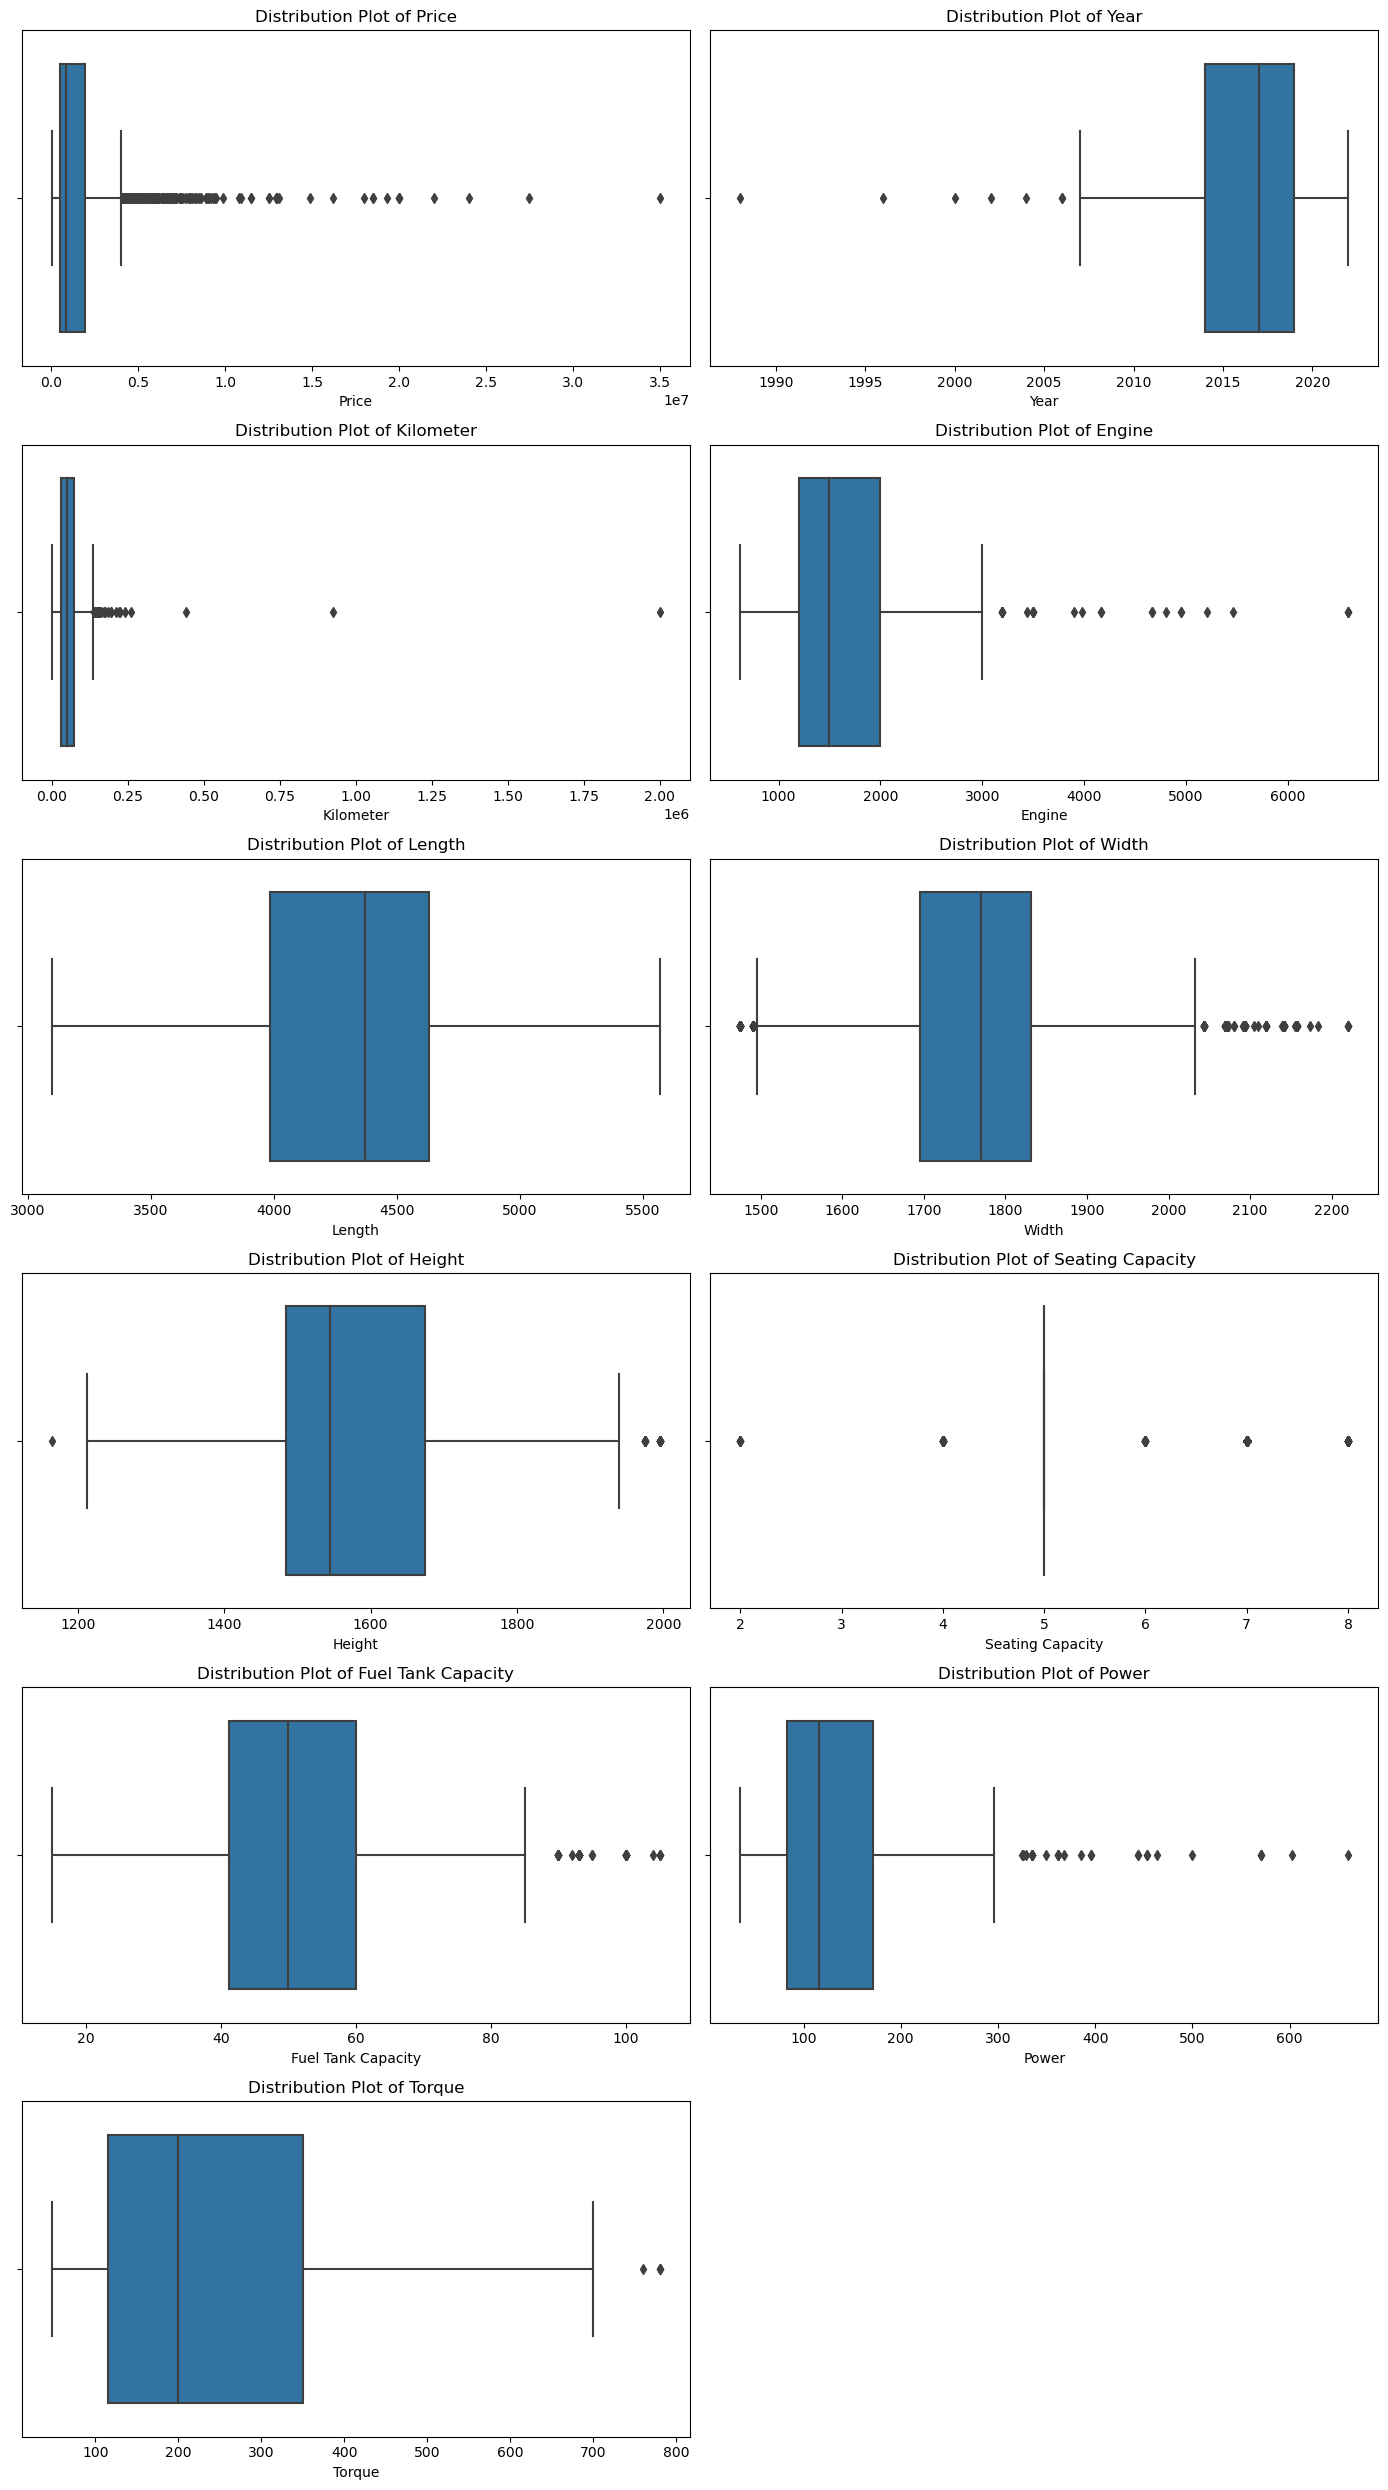

In [20]:
d = ["Price","Year", "Kilometer","Engine","Length", "Width", "Height","Seating Capacity","Fuel Tank Capacity",
     "Power", "Torque"]

# Convert columns to numeric types
numeric_columns = [pd.to_numeric(car_df[column], errors='coerce') for column in d]

fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(14, 25))
axs = axs.flatten()

for i, var in enumerate(numeric_columns):
    sns.boxplot(x=var, ax=axs[i])
    axs[i].set_title(f"Distribution Plot of {d[i]}")
fig.delaxes(axs[11])                           
fig.tight_layout()
plt.show()

In [21]:
# Select the columns for outlier detection
columns_to_treat = ["Price", "Year", "Kilometer", "Engine", "Width","Fuel Tank Capacity","Power"]

for column in columns_to_treat:
    # Calculate the interquartile range (IQR)
    Q1 = car_df[column].quantile(0.25)
    Q3 = car_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers using the IQR method
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = car_df[(car_df[column] < lower_bound) | (car_df[column] > upper_bound)]

    # Calculate the median of non-outlier data
    median = car_df[(car_df[column] >= lower_bound) & (car_df[column] <= upper_bound)][column].median()

    # Replace outliers with the median value
    car_df.loc[car_df[column] < lower_bound, column] = median
    car_df.loc[car_df[column] > upper_bound, column] = median

In [22]:
car_df.isna().sum()

Make                    0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Color                   0
Seller Type             0
Engine                 80
Drivetrain              0
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
Power                  80
Torque                 80
dtype: int64

In [23]:
# List of columns to fill missing values
columns_to_fill = ['Engine', 'Length','Width', 'Height','Seating Capacity',"Fuel Tank Capacity","Power","Torque"]

# Fill missing values with the mean for each column
for column in columns_to_fill:
    car_df[column].fillna(car_df[column].mean(), inplace=True)

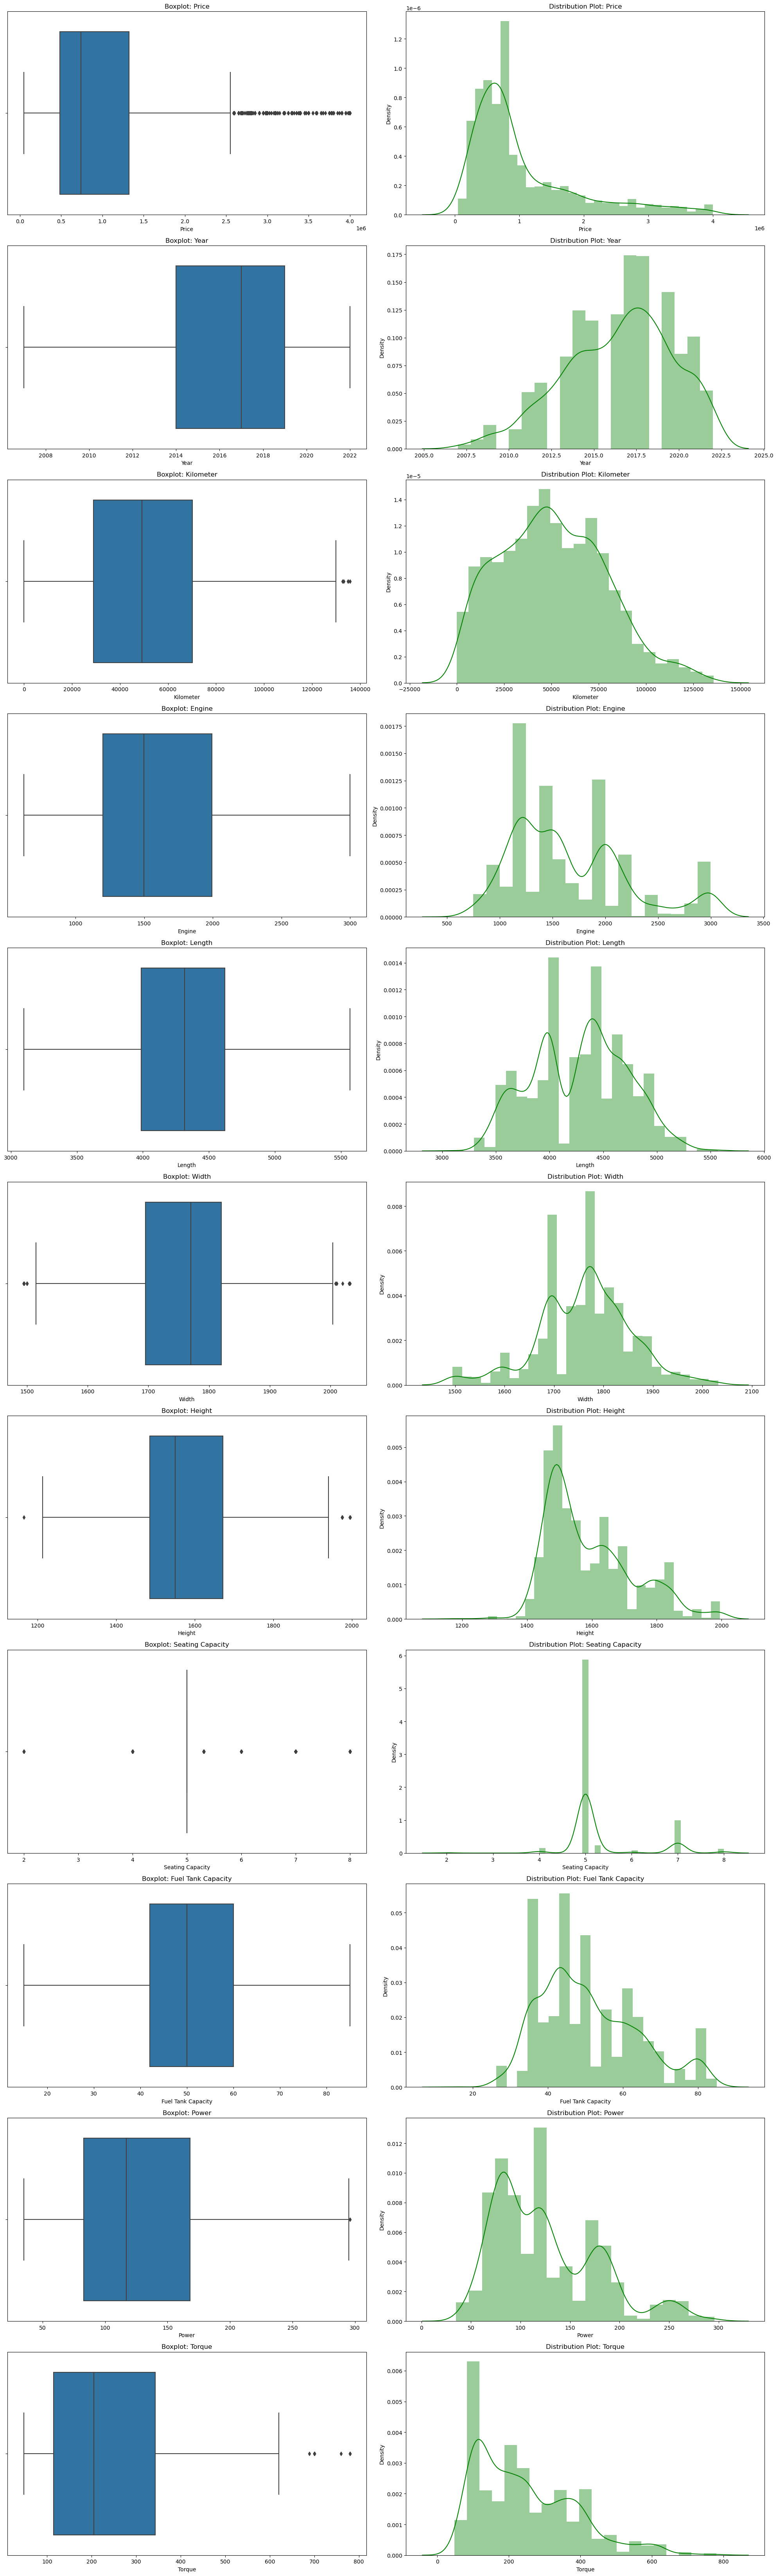

In [24]:
columns = ["Price","Year", "Kilometer","Engine","Length", "Width", "Height","Seating Capacity","Fuel Tank Capacity",
          "Power","Torque"]

# Plotting all the columns
fig, axs = plt.subplots(len(columns), 2, figsize=(20, len(columns) * 6))

for i, column in enumerate(columns):
   # Plotting the distribution plot using distplot
    sns.distplot(car_df[column], ax=axs[i][1], color="g")
    axs[i][1].set_title(f"Distribution Plot: {column}")

    # Plotting the boxplot of the column
    sns.boxplot(data=car_df, x=column, ax=axs[i][0])
    axs[i][0].set_title(f"Boxplot: {column}")
fig.tight_layout()
plt.show()

## Bivarite Analysis

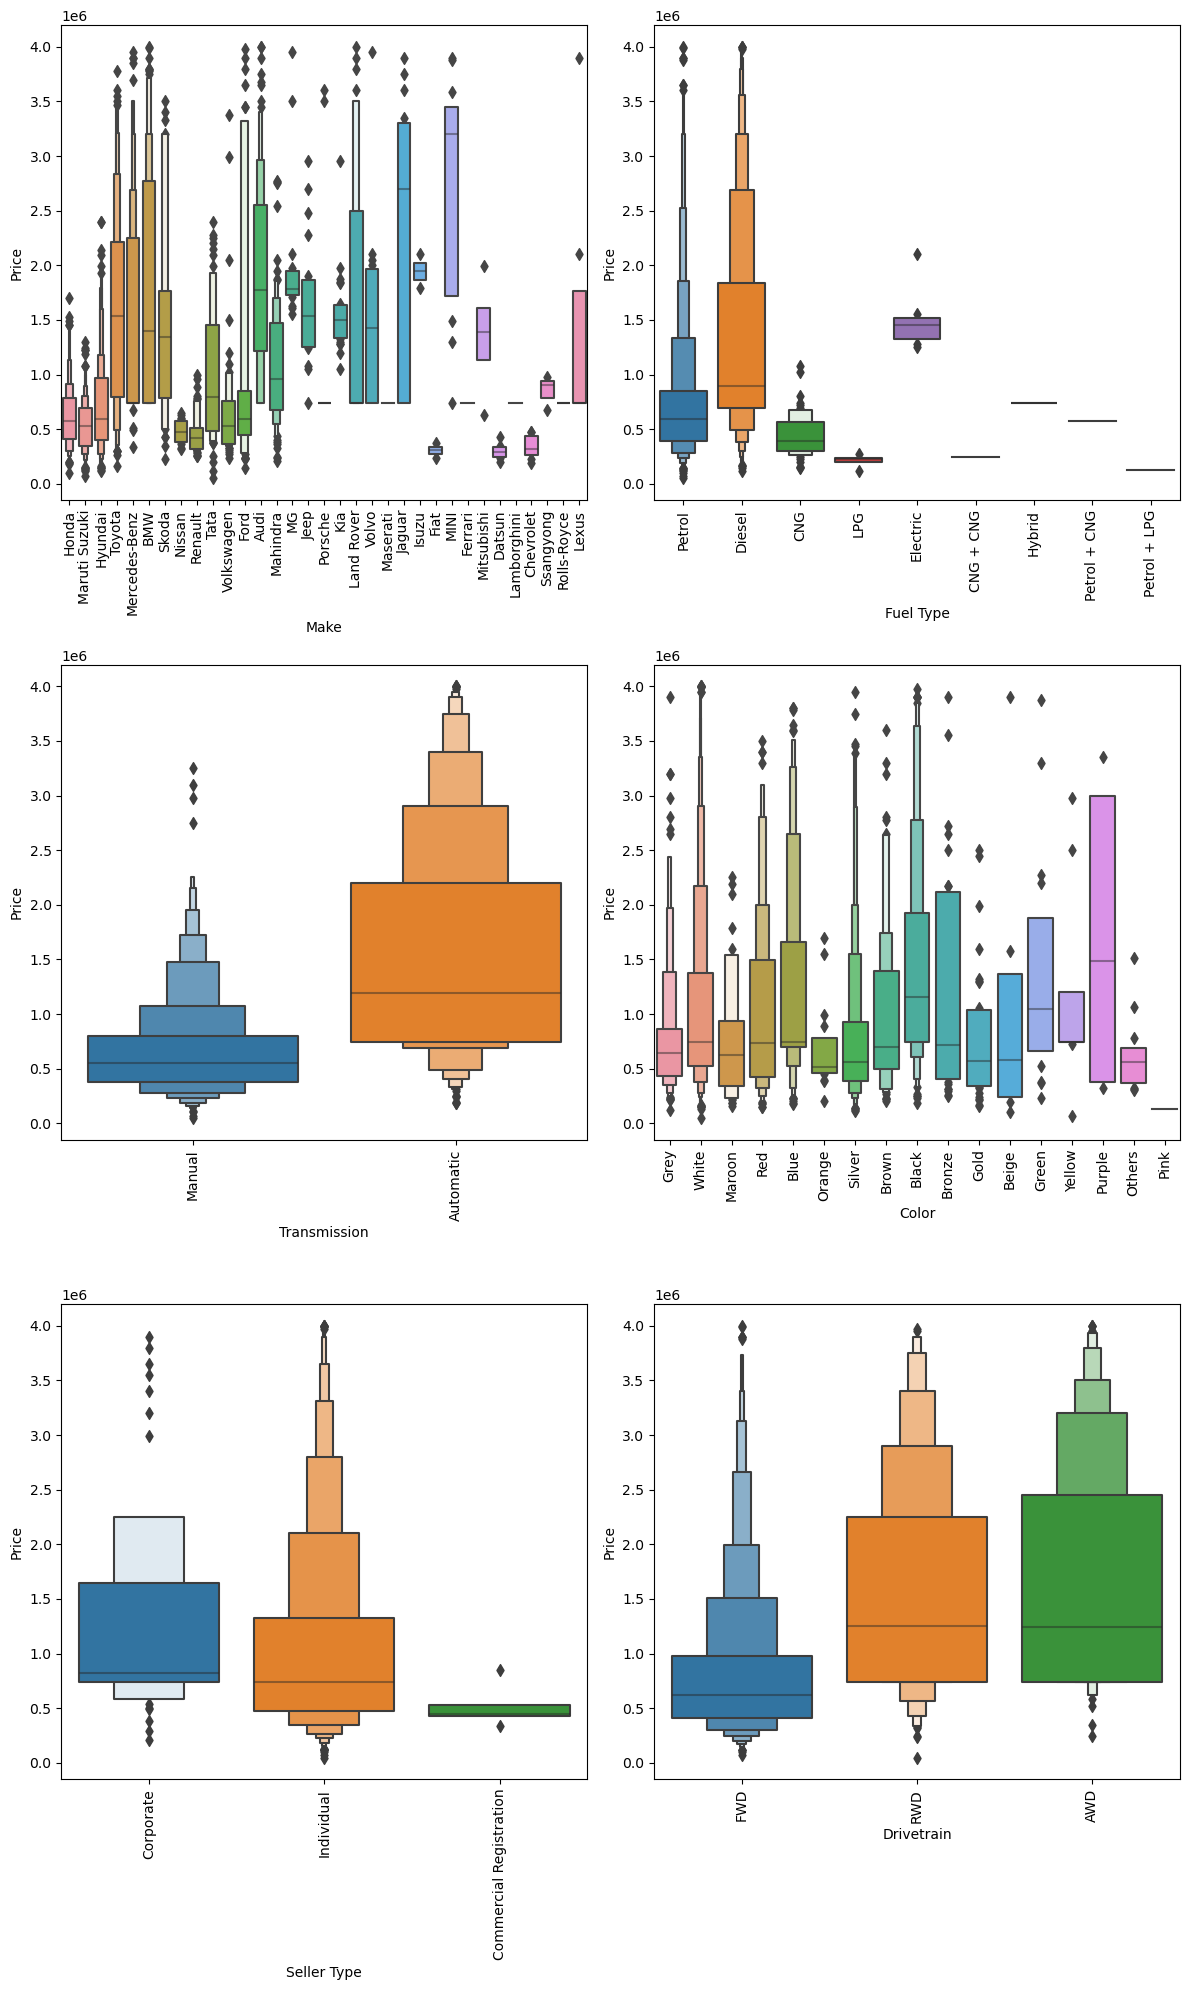

In [25]:
data=["Make","Fuel Type","Transmission","Color","Seller Type","Drivetrain"]
fig, axs=plt.subplots(nrows = 3, ncols = 2, figsize = (12,20))
axs =axs.flatten()
for i , var in enumerate(data):
    sns.boxenplot(x = var,y='Price',data = car_df, ax = axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
fig.tight_layout()
plt.show()

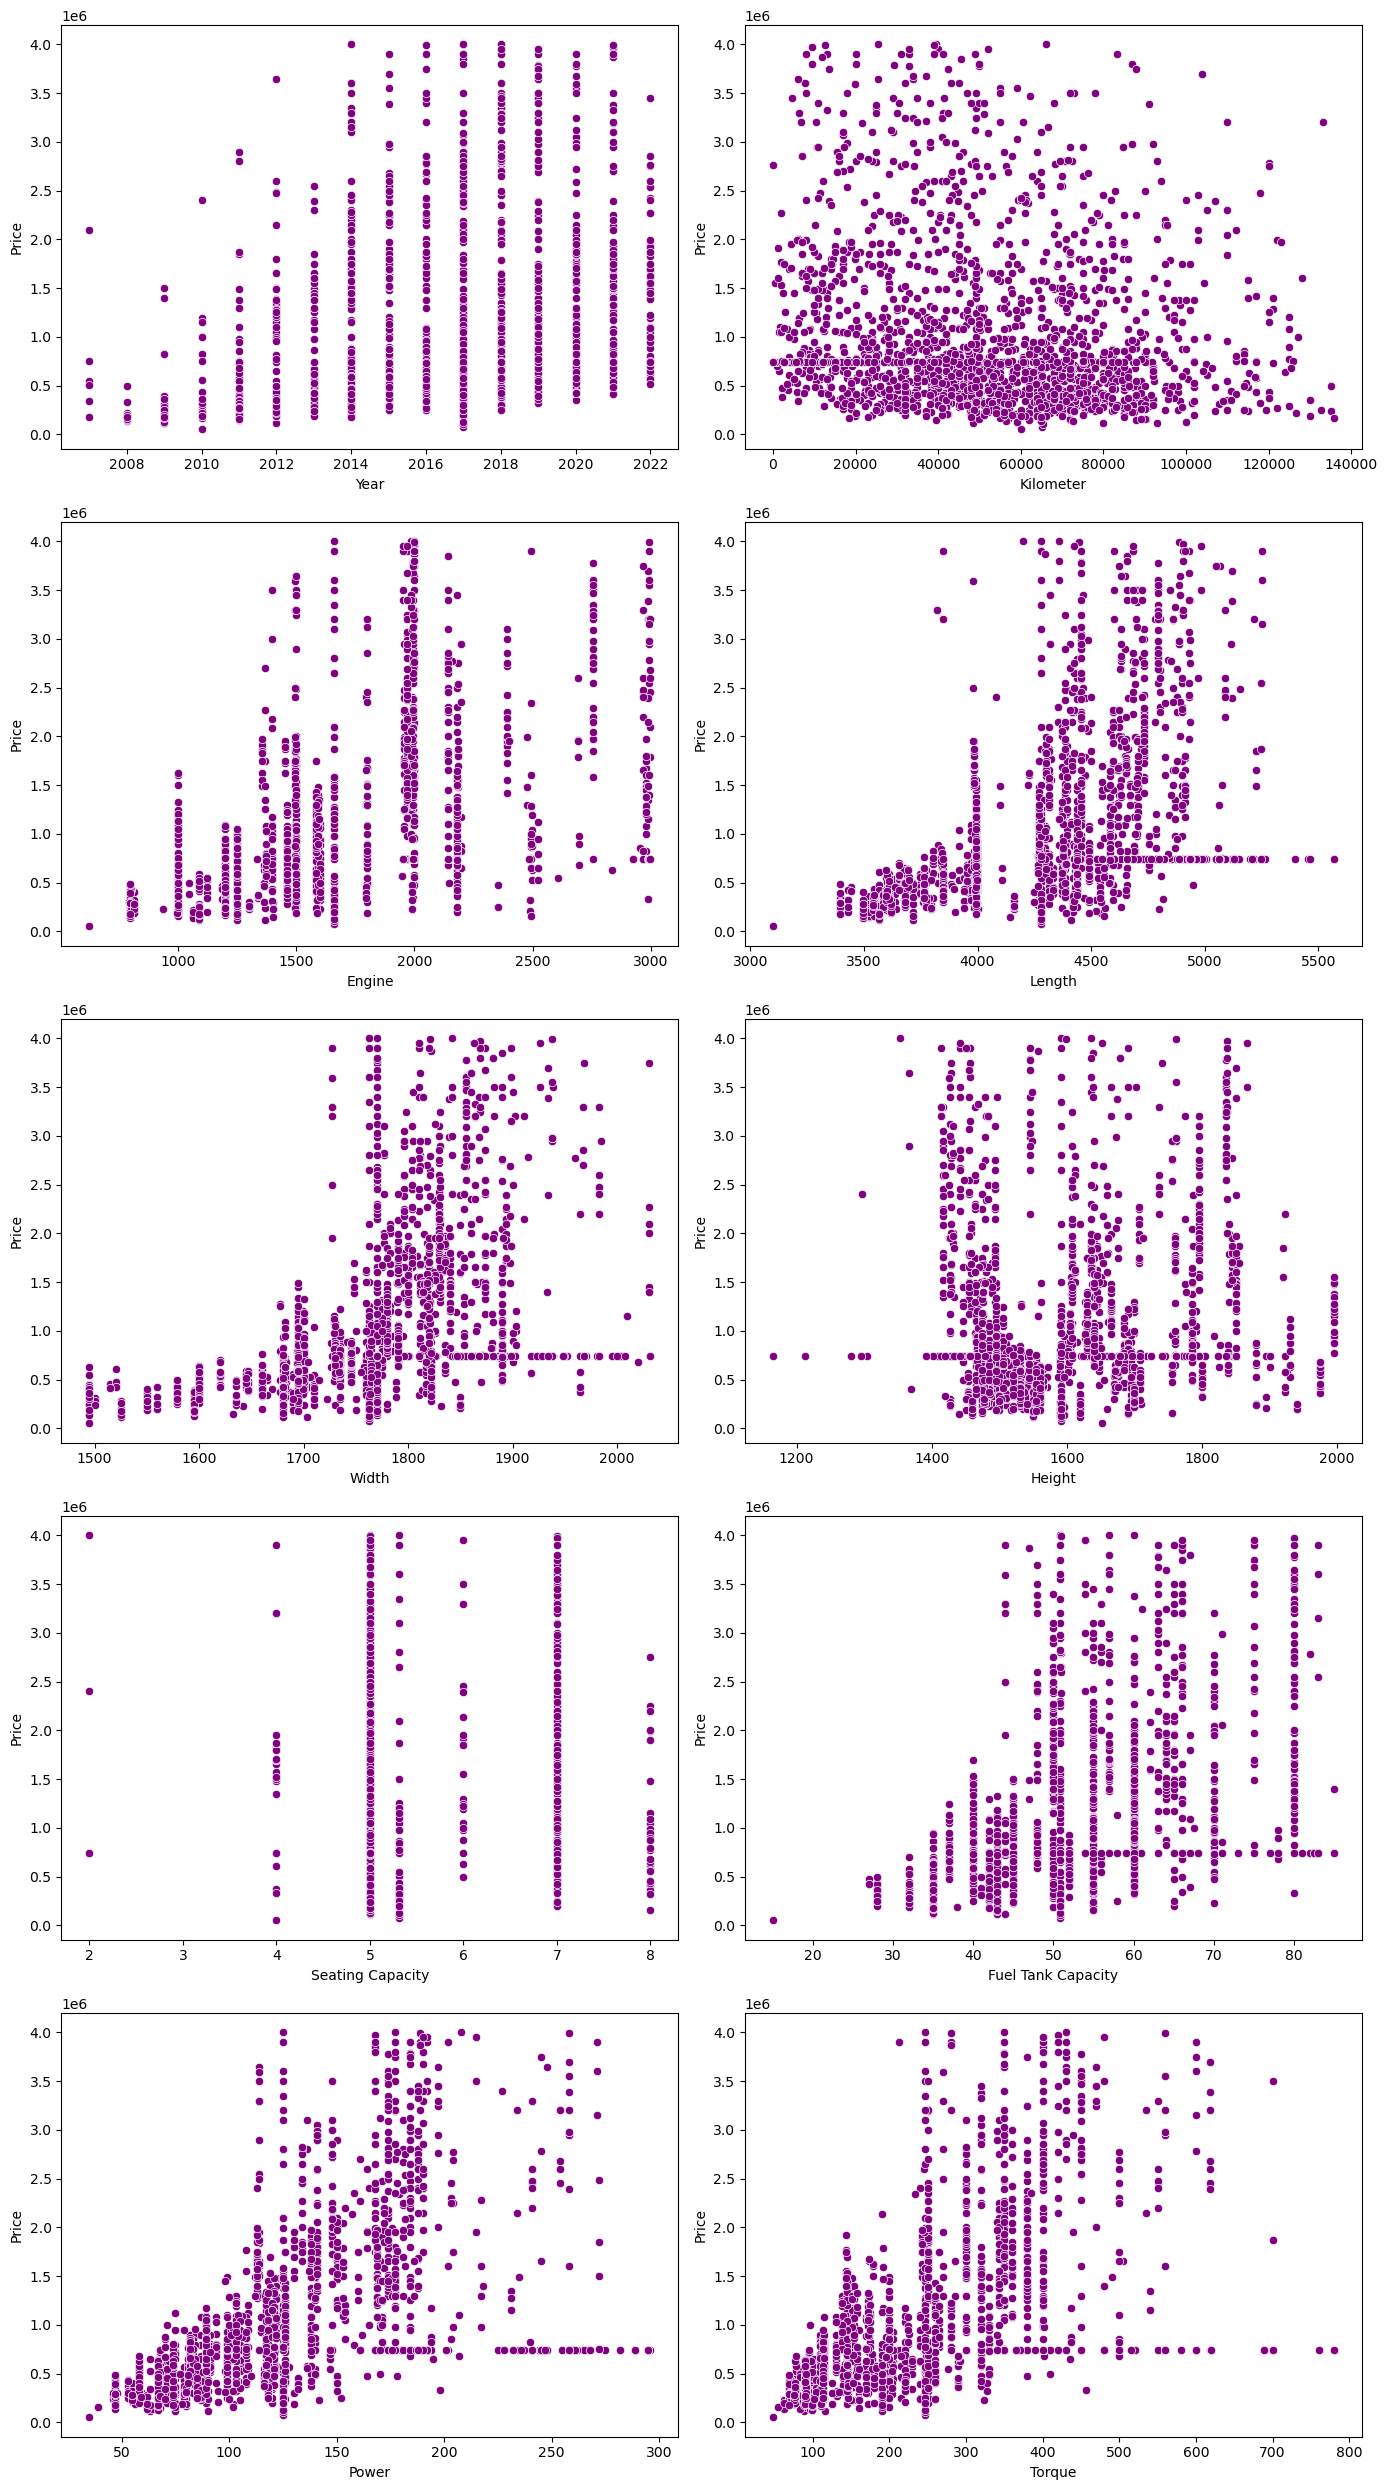

In [26]:
d = ["Year", "Kilometer","Engine","Length", "Width", "Height","Seating Capacity","Fuel Tank Capacity",
                 "Power","Torque"]
# Convert columns to numeric types
num_columns = [pd.to_numeric(car_df[column], errors='coerce') for column in d]

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(14, 25))
axs = axs.flatten()

for i, var in enumerate(num_columns):
    sns.scatterplot(x=var,y='Price' ,data = car_df,ax=axs[i],color="purple")
fig.tight_layout()
plt.show()

## Multivariate Analysis

<AxesSubplot:>

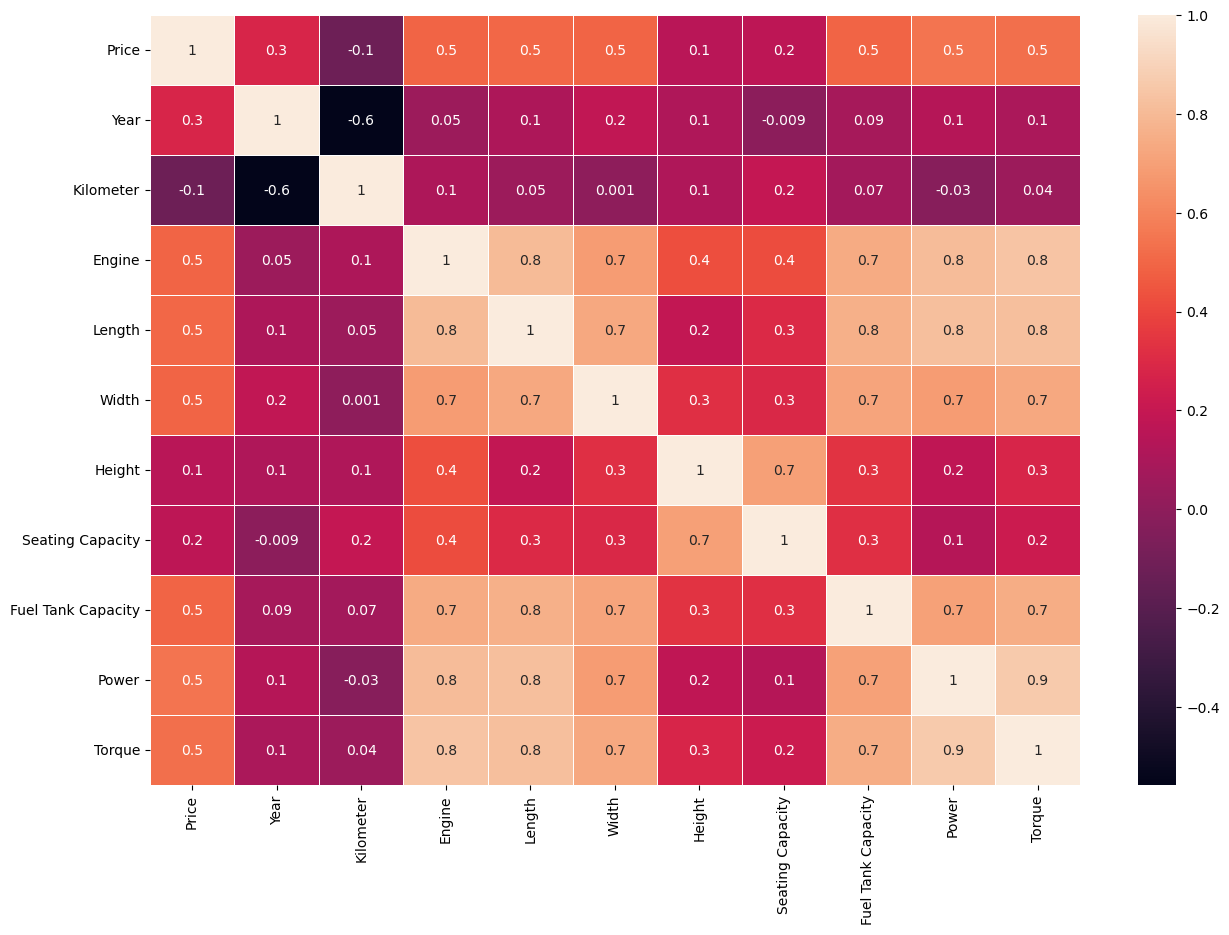

In [27]:
#correlation matrix
corrmat = car_df.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(car_df.corr(), cbar=True , fmt='.1g',annot=True,linewidth=0.5)

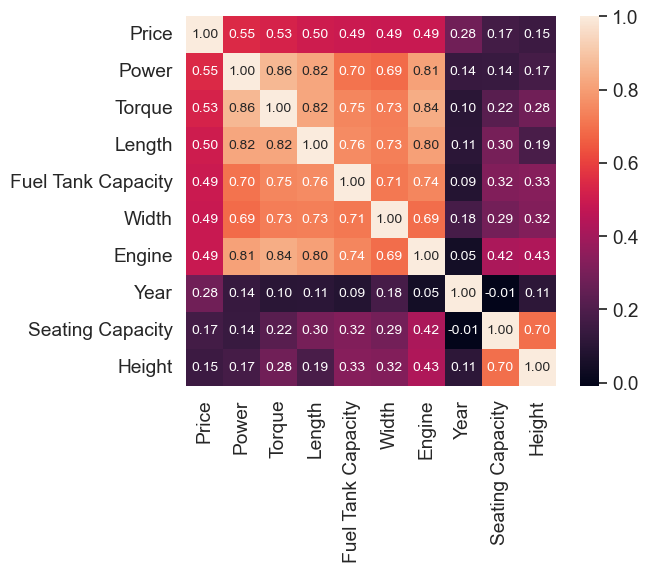

In [28]:
#price correlation matrix
k = 10 #number of varibales for heatmap
cols = corrmat.nlargest(k,'Price')['Price'].index
cm = np.corrcoef(car_df[cols].values.T)
sns.set(font_scale=1.25)
hm =  sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values,xticklabels=cols.values)
plt.show();

In [29]:
car_df.isna().sum()

Make                  0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Color                 0
Seller Type           0
Engine                0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Power                 0
Torque                0
dtype: int64

In [30]:
X= car_df.loc[:, car_df.columns!= 'Price']
y=car_df.Price

In [31]:
X

,Make,Year,Kilometer,Fuel Type,Transmission,Color,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power,Torque
0,Honda,2017,87150,Petrol,Manual,Grey,Corporate,1198.0,FWD,3990.0,1680.0,1505.0,5.0,35.000000,87.0,109.0000
1,Maruti Suzuki,2014,75000,Diesel,Manual,White,Individual,1248.0,FWD,3995.0,1695.0,1555.0,5.0,42.000000,74.0,190.0000
2,Hyundai,2011,67000,Petrol,Manual,Maroon,Individual,1197.0,FWD,3585.0,1595.0,1550.0,5.0,35.000000,79.0,112.7619
3,Toyota,2019,37500,Petrol,Manual,Red,Individual,1197.0,FWD,3995.0,1745.0,1510.0,5.0,37.000000,82.0,113.0000
4,Toyota,2018,69000,Diesel,Manual,Grey,Individual,2393.0,RWD,4735.0,1830.0,1795.0,7.0,55.000000,148.0,343.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,2016,90300,Diesel,Manual,White,Individual,2179.0,FWD,4585.0,1890.0,1785.0,7.0,70.000000,138.0,330.0000
2055,Hyundai,2014,83000,Petrol,Manual,White,Individual,814.0,FWD,3495.0,1550.0,1500.0,5.0,32.000000,55.0,75.0000
2056,Ford,2013,73000,Petrol,Manual,Silver,Individual,1196.0,FWD,3795.0,1680.0,1427.0,5.0,45.000000,70.0,102.0000
2057,BMW,2018,60474,Diesel,Automatic,White,Individual,1995.0,RWD,4936.0,1868.0,1479.0,5.0,65.000000,188.0,400.0000


In [32]:
y

0        505000
1        450000
2        220000
3        799000
4       1950000
         ...   
2054     850000
2055     275000
2056     240000
2057     740000
2058     670000
Name: Price, Length: 2059, dtype: int64

In [33]:
columns_to_encode = ['Make','Fuel Type','Transmission','Color','Seller Type','Drivetrain']
encoded_df = pd.get_dummies(X[columns_to_encode])
X= pd.concat([X, encoded_df], axis=1)
X.drop(columns_to_encode, axis=1, inplace=True)
X

,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power,Torque,...,Color_Red,Color_Silver,Color_White,Color_Yellow,Seller Type_Commercial Registration,Seller Type_Corporate,Seller Type_Individual,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD
0,2017,87150,1198.0,3990.0,1680.0,1505.0,5.0,35.000000,87.0,109.0000,...,0,0,0,0,0,1,0,0,1,0
1,2014,75000,1248.0,3995.0,1695.0,1555.0,5.0,42.000000,74.0,190.0000,...,0,0,1,0,0,0,1,0,1,0
2,2011,67000,1197.0,3585.0,1595.0,1550.0,5.0,35.000000,79.0,112.7619,...,0,0,0,0,0,0,1,0,1,0
3,2019,37500,1197.0,3995.0,1745.0,1510.0,5.0,37.000000,82.0,113.0000,...,1,0,0,0,0,0,1,0,1,0
4,2018,69000,2393.0,4735.0,1830.0,1795.0,7.0,55.000000,148.0,343.0000,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2016,90300,2179.0,4585.0,1890.0,1785.0,7.0,70.000000,138.0,330.0000,...,0,0,1,0,0,0,1,0,1,0
2055,2014,83000,814.0,3495.0,1550.0,1500.0,5.0,32.000000,55.0,75.0000,...,0,0,1,0,0,0,1,0,1,0
2056,2013,73000,1196.0,3795.0,1680.0,1427.0,5.0,45.000000,70.0,102.0000,...,0,1,0,0,0,0,1,0,1,0
2057,2018,60474,1995.0,4936.0,1868.0,1479.0,5.0,65.000000,188.0,400.0000,...,0,0,1,0,0,0,1,0,0,1


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## Logistic Regression

In [35]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
y_lin=lr.predict(X_test)
y_lin

array([ 9.77127852e+05,  1.87615543e+05,  3.50034339e+05,  6.90740381e+05,
        4.80032594e+05,  5.04859259e+05,  1.21548147e+06,  1.89564751e+06,
        1.77930329e+06,  1.92691373e+06,  7.64759784e+05,  1.68023585e+06,
        1.65462297e+06,  1.11874529e+06,  1.11139655e+06,  9.86574072e+05,
        1.87080549e+06,  8.83458863e+05,  3.22303997e+05,  5.18437948e+05,
        1.19717071e+06,  1.78650613e+06,  4.97138581e+05,  8.25778362e+05,
        1.39138292e+06,  1.02891379e+06,  1.95943734e+06,  1.86160360e+06,
        1.14980862e+06,  4.34038323e+05,  1.94094013e+06,  6.40481746e+05,
        1.18350968e+06,  1.23892152e+06,  6.71083687e+05,  3.35310431e+05,
        1.44608712e+06,  9.37875759e+05,  1.82166452e+06,  1.85281012e+06,
        1.94849870e+06,  1.30936267e+06,  9.83945830e+05,  1.08986407e+06,
        1.93057602e+06,  3.95528883e+05,  1.77006610e+06,  5.37581898e+05,
        1.26856287e+06,  1.40641169e+05,  1.82750393e+06,  8.02345069e+05,
        1.26292088e+06,  

In [37]:
y_test

1826     240000
1505     155000
1994     180000
1349     625000
781      484999
         ...   
1236    1395000
1426    3100000
22       589000
574     1195000
45       625000
Name: Price, Length: 618, dtype: int64

In [38]:
from sklearn.metrics import r2_score, accuracy_score
r2_score(y_test,y_lin)

0.4329947598192825

## SVR Regression

In [39]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)

SVR()

In [40]:
y_svr_test = regressor.predict(X_test)
y_svr_test

array([739973.18863449, 739944.46301419, 739976.99624289, 739995.12242827,
       739961.50905377, 739980.76957299, 740006.28548268, 739995.4171638 ,
       739981.90001852, 739963.42842221, 739947.6089629 , 739965.0262331 ,
       739954.21874752, 740001.90237133, 739946.47353597, 739945.44675518,
       739997.12692443, 739985.21236265, 739958.53339005, 739968.71447057,
       739975.16284977, 739945.39626574, 739966.91760989, 739944.72908208,
       739944.79869435, 740006.44149565, 739973.09887357, 739997.92487515,
       740006.28016518, 739970.67044695, 739946.65673503, 739980.26251398,
       739954.32847021, 739944.60638059, 739965.90246378, 739944.67707664,
       740002.5900594 , 739995.26749192, 740006.65573598, 739970.67300191,
       740004.01995539, 739963.93386923, 739944.91843723, 739952.10649713,
       739992.47792096, 739965.72959863, 739953.63261982, 739969.11375235,
       739945.41133636, 739944.47047982, 740001.98208051, 739950.45625218,
       739982.19512545, 7

In [41]:
y_test

1826     240000
1505     155000
1994     180000
1349     625000
781      484999
         ...   
1236    1395000
1426    3100000
22       589000
574     1195000
45       625000
Name: Price, Length: 618, dtype: int64

In [42]:
r2_score(y_test, y_svr_test)

-0.11511710040588641

## Ridge Regression

In [43]:
from sklearn.linear_model import Ridge 
from sklearn.model_selection import GridSearchCV
RidgeReg = Ridge()
parameters = {'alpha':[1,2,3,4,5,10,15,20,25,30,35,40,45,50]}

ridgecv = GridSearchCV(RidgeReg, parameters , scoring = 'neg_mean_squared_error', cv = 5) 

In [44]:
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40,
                                   45, 50]},
             scoring='neg_mean_squared_error')

In [45]:
y_ridge = ridgecv.predict(X_test)
y_ridge

array([ 961372.89311068,  164875.07684894,  328864.88459514,
        673406.3637833 ,  475099.58544411,  509262.23211792,
       1242389.0840936 , 1557240.83640262, 1751154.86494824,
       1904582.72715062,  774253.5356756 , 1694768.64829682,
       1579459.13281925, 1139713.3721824 , 1046644.53808756,
        920994.69599231, 1822907.61984713,  906814.37207371,
        317427.09356603,  518860.65962835, 1214842.96668105,
       1753721.33845215,  600542.24119473,  842364.95077819,
       1429666.14204894, 1045269.65576409, 1938768.30571179,
       1813348.48910256, 1157525.1064581 ,  461651.72499311,
       1918998.55276737,  621550.23894382, 1122440.1678647 ,
       1245777.61943473,  678695.70313546,  341517.66077262,
       1403213.07203059,  956623.07597218, 1835629.20252423,
       1847849.54256015, 1911323.37725987, 1240617.26362191,
        935343.13965553, 1030060.7026016 , 1884503.82166512,
        511790.39602609, 1726837.90684818,  537249.18904236,
       1184632.36687374,

In [46]:
ridgecv.best_score_

-403113489790.36896

In [47]:
r2_score(y_test,y_ridge)

0.43480189229894395

In [48]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_ridge)

368989606739.2043

In [49]:
mean_squared_error(y_test,y_lin)

370169393249.29755

## Lasso Regression

In [50]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha':[1,2,3,4,5,10,15,20,25,30,35,40,45,50]}

lassocv = GridSearchCV(lasso, parameters , scoring = 'neg_mean_squared_error', cv = 5) 

In [51]:
lassocv.fit(X_train,y_train)
lassocv.best_params_

{'alpha': 50}

In [52]:
lassocv.best_score_

-410110527316.79004

In [53]:
y_lasso = lassocv.predict(X_test)
y_lasso

array([ 971705.48268798,  181166.65148081,  346763.72611162,
        689041.04382905,  479947.387355  ,  505775.26875655,
       1219027.72101204, 1852842.08762634, 1778016.66030662,
       1924171.1866563 ,  766281.7938976 , 1678494.62371288,
       1649738.95494024, 1122576.3016149 , 1105785.15744564,
        979725.43127979, 1867702.78072895,  885125.01951599,
        322258.26146427,  518275.85686415, 1194401.81228802,
       1786389.88594259,  504863.05984226,  828062.18814588,
       1396297.38824238, 1030566.7463285 , 1955642.09495778,
       1854705.63921972, 1149019.37527707,  442601.83862594,
       1937541.14926217,  639607.23352224, 1178795.32805388,
       1233449.61963221,  673191.12072591,  335912.30670741,
       1442714.31219429,  940394.99785453, 1822239.64533025,
       1855494.82654512, 1947166.86665542, 1204370.95410809,
        982844.20548618, 1085500.86316915, 1927730.39180078,
        497831.97908984, 1768343.67032444,  537636.9467919 ,
       1260650.12125368,

In [54]:
y_test

1826     240000
1505     155000
1994     180000
1349     625000
781      484999
         ...   
1236    1395000
1426    3100000
22       589000
574     1195000
45       625000
Name: Price, Length: 618, dtype: int64

In [55]:
r2_score(y_test,y_lasso)

0.43498984994202083

## Elastic Net

In [56]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
Elnet = ElasticNet(alpha = 0.005, l1_ratio = 0.09)
Elnet.fit(X_train, y_train)

ElasticNet(alpha=0.005, l1_ratio=0.09)

In [57]:
y_pred = Elnet.predict(X_test)
y_pred

array([ 9.58720692e+05,  1.63679840e+05,  3.26711774e+05,  6.71505560e+05,
        4.75419933e+05,  5.10588123e+05,  1.24630162e+06,  1.55383149e+06,
        1.74492562e+06,  1.90179493e+06,  7.76049344e+05,  1.69996530e+06,
        1.56407450e+06,  1.14228895e+06,  1.03449778e+06,  9.08777329e+05,
        1.81302162e+06,  9.08730275e+05,  3.17623845e+05,  5.19695323e+05,
        1.22063123e+06,  1.74856862e+06,  6.17804221e+05,  8.46072625e+05,
        1.43701798e+06,  1.04777603e+06,  1.93637127e+06,  1.80300371e+06,
        1.15905120e+06,  4.70320773e+05,  1.91390705e+06,  6.18756806e+05,
        1.11180963e+06,  1.25036263e+06,  6.80261637e+05,  3.42248626e+05,
        1.39357391e+06,  9.57498208e+05,  1.84042574e+06,  1.84450337e+06,
        1.90173753e+06,  1.23517008e+06,  9.23757559e+05,  1.01835995e+06,
        1.87485202e+06,  5.23873810e+05,  1.71780703e+06,  5.38083306e+05,
        1.16919129e+06,  1.34462198e+05,  1.86129032e+06,  8.03895626e+05,
        1.26994185e+06,  

In [58]:
y_test

1826     240000
1505     155000
1994     180000
1349     625000
781      484999
         ...   
1236    1395000
1426    3100000
22       589000
574     1195000
45       625000
Name: Price, Length: 618, dtype: int64

In [59]:
r2_score(y_test, y_pred)

0.43415614530273194

## SVR

In [60]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)

SVR()

In [61]:
y_svr_test = regressor.predict(X_test)
y_svr_test

array([739973.18863449, 739944.46301419, 739976.99624289, 739995.12242827,
       739961.50905377, 739980.76957299, 740006.28548268, 739995.4171638 ,
       739981.90001852, 739963.42842221, 739947.6089629 , 739965.0262331 ,
       739954.21874752, 740001.90237133, 739946.47353597, 739945.44675518,
       739997.12692443, 739985.21236265, 739958.53339005, 739968.71447057,
       739975.16284977, 739945.39626574, 739966.91760989, 739944.72908208,
       739944.79869435, 740006.44149565, 739973.09887357, 739997.92487515,
       740006.28016518, 739970.67044695, 739946.65673503, 739980.26251398,
       739954.32847021, 739944.60638059, 739965.90246378, 739944.67707664,
       740002.5900594 , 739995.26749192, 740006.65573598, 739970.67300191,
       740004.01995539, 739963.93386923, 739944.91843723, 739952.10649713,
       739992.47792096, 739965.72959863, 739953.63261982, 739969.11375235,
       739945.41133636, 739944.47047982, 740001.98208051, 739950.45625218,
       739982.19512545, 7

In [62]:
y_test

1826     240000
1505     155000
1994     180000
1349     625000
781      484999
         ...   
1236    1395000
1426    3100000
22       589000
574     1195000
45       625000
Name: Price, Length: 618, dtype: int64

In [63]:
r2_score(y_test, y_svr_test)

-0.11511710040588641

## DTREE

In [64]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 8, criterion = 'mse', min_samples_split = 7, random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, min_samples_split=7,
                      random_state=0)

In [65]:
y_dtree_test = regressor.predict(X_test)
y_dtree_test

array([ 397199.85      ,  266755.06122449,  266755.06122449,
        714363.62121212,  714363.62121212,  601058.76470588,
       1550922.92307692,  807222.22222222, 1370360.        ,
        740000.        ,  607259.25925926, 2547680.        ,
       1632952.33333333,  888464.25      ,  601058.76470588,
        392714.21428571, 2194944.33333333,  525727.09090909,
        397199.85      ,  525066.6       , 1175384.46153846,
       2148711.06666667,  407523.66666667,  918352.82352941,
       2547680.        ,  714363.62121212, 2569500.        ,
       2194944.33333333,  436666.66666667,  489647.        ,
       1858906.65333333,  883571.14285714,  923684.10526316,
       2350000.        ,  918352.82352941,  266755.06122449,
        888464.25      ,  609200.        ,  807222.22222222,
       1419249.875     ,  807222.22222222, 1062304.2826087 ,
        981500.        ,  280388.83333333, 2194944.33333333,
        714363.62121212, 1419249.875     ,  514625.        ,
        641071.42857143,

In [66]:
y_test

1826     240000
1505     155000
1994     180000
1349     625000
781      484999
         ...   
1236    1395000
1426    3100000
22       589000
574     1195000
45       625000
Name: Price, Length: 618, dtype: int64

In [67]:
r2_score(y_test, y_dtree_test)

0.6099422971901929

In [68]:
regressor.score(X_train,y_train)

0.7833998530044686

## Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [70]:
y_rforest_test = regressor.predict(X_test)
y_rforest_test

array([ 606499.8       ,  238400.        ,  246800.        ,
        652500.        ,  656500.        ,  651699.9       ,
       1252500.        , 1710500.        , 1568000.        ,
        970500.        ,  637500.        , 2234000.        ,
       1505500.        ,  975499.8       ,  648000.        ,
        413499.8       , 2123899.9       ,  548200.        ,
        384999.8       ,  499100.        , 1071500.        ,
       1622499.9       ,  431999.9       ,  880499.8       ,
       2625000.        ,  675900.        , 1388800.        ,
       2055399.7       ,  510000.        ,  487000.        ,
       1934400.        ,  783599.3       ,  902499.7       ,
       2308500.        ,  869000.        ,  270500.        ,
        927700.        ,  571400.        ,  740000.        ,
       1916599.7       ,  740000.        , 1382500.        ,
        672000.        ,  576500.        , 2035999.9       ,
        590000.        , 1820699.9       ,  452000.        ,
        598000.        ,

In [71]:
y_test

1826     240000
1505     155000
1994     180000
1349     625000
781      484999
         ...   
1236    1395000
1426    3100000
22       589000
574     1195000
45       625000
Name: Price, Length: 618, dtype: int64

In [72]:
r2_score(y_test,y_rforest_test)

0.7311600642191828

In [73]:
regressor.score(X_train,y_train)

0.9398338664113345

In [74]:
regressor.score(X_test,y_test)

0.7311600642191828